In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


In [ ]:
!unzip Garbage\ classification.zip -d /content/waste_dataset


Archive:  Garbage classification.zip
   creating: /content/waste_dataset/Garbage classification/
   creating: /content/waste_dataset/Garbage classification/cardboard/
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard1.jpg  
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard10.jpg  
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard100.jpg  
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard101.jpg  
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard102.jpg  
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard103.jpg  
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard104.jpg  
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard105.jpg  
  inflating: /content/waste_dataset/Garbage classification/cardboard/cardboard106.jpg  
  inflating: /content/waste_dataset/Garbage 

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create training and validation image generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    '/content/waste_dataset/Garbage classification',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
     '/content/waste_dataset/Garbage classification',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.2450 - loss: 3.0972 - val_accuracy: 0.3698 - val_loss: 1.5209
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.5105 - loss: 1.3051 - val_accuracy: 0.4632 - val_loss: 1.4387
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6437 - loss: 1.0022 - val_accuracy: 0.4553 - val_loss: 1.5213
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7028 - loss: 0.8062 - val_accuracy: 0.4294 - val_loss: 1.4391
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8212 - loss: 0.5406 - val_accuracy: 0.4891 - val_loss: 1.4917
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8885 - loss: 0.3850 - val_accuracy: 0.4851 - val_loss: 1.7772
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9446 - loss: 0.2115 - val_accuracy: 0.4950 - val_loss: 2.0322
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9684 - loss: 0.1348 - val_accuracy: 0.4911 - val_los

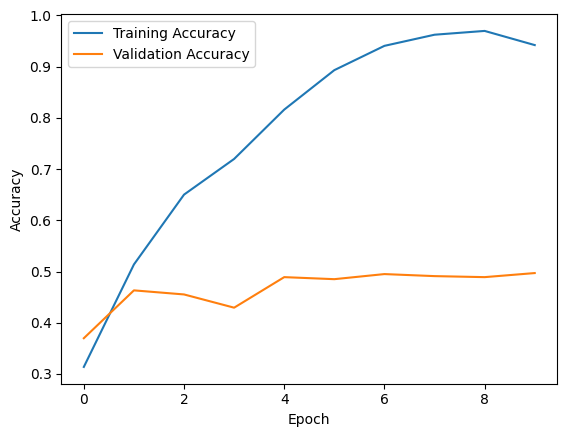

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
train_data.class_indices

